<a href="https://colab.research.google.com/github/ArnikaModadugu/Healthcare_Readmission/blob/main/Healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
import pandas as pd
import requests
import io

# URL of the CSV file
url = "https://data.mendeley.com/public-files/datasets/nntck7ddgt/files/ad5a60c4-3ba4-461d-9c30-c082c44d2067/file_downloaded"

# Specify user-agent
user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'

# Send a request to the server with the specified user-agent
response = requests.get(url, headers={'User-Agent': user_agent})

# Read the CSV file into a DataFrame
try:
    # Create a file-like object from the response content
    file_like_object = io.BytesIO(response.content)
    # Read the CSV content from the file-like object into a DataFrame
    df = pd.read_csv(file_like_object)
    # Display the first few rows of the DataFrame
    print(df.head())
except Exception as e:
    print("An error occurred:", e)


   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [ ]:
# Initialize an empty list to store column names
columns_with_high_percentage = []
columns_with_nullvalues = []
# Set the threshold percentage
threshold_percentage = 40

# Iterate over each column in the DataFrame
for column in df.columns:
    # Calculate the percentage of '?' in the current column
    percentage = (df[column] == '?').sum() / len(df[column]) * 100
    # Check if the percentage is greater than the threshold
    if percentage > threshold_percentage:
        columns_with_high_percentage.append(column)
    if percentage >0:
        columns_with_nullvalues.append(column)

In [ ]:
columns_with_high_percentage

['weight', 'medical_specialty']

In [ ]:
df.drop(columns=columns_with_high_percentage, inplace=True)

In [ ]:
columns_with_nullvalues

['race',
 'weight',
 'payer_code',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3']

In [ ]:
df.drop(columns='payer_code', inplace=True)

In [ ]:
# Replace '?' values with NaN
df.replace('?', inplace=True, value=pd.NA)

# Drop rows containing NaN values
df_cleaned = df.dropna()



In [ ]:
binaryCols = ['change','diabetesMed']
for i in binaryCols:
    df[i] = df[i].apply(lambda x: 0 if x == 'No' else 1)

In [ ]:
binaryCols = ['readmitted']
for i in binaryCols:
    df[i] = df[i].apply(lambda x: 0 if x == 'NO' else 1)

In [ ]:
# define function to remove the outliers
def remove_outlier(df, cols):
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        low_bound = q1 - 1.5*iqr
        upp_bound = q1 + 1.5*iqr
        df = df[(df[col] >= low_bound) & (df[col] <= upp_bound)]
    return df

# specify particular columns to remove outliers
cols_to_check = ['num_medications', 'number_outpatient', 'number_inpatient', 'number_emergency']

# calling the function
df_final = remove_outlier(df, cols_to_check)
pd.set_option('display.max_columns',None)
print(df_final)






        encounter_id  patient_nbr             race  gender      age  \
0            2278392      8222157        Caucasian  Female   [0-10)   
1             149190     55629189        Caucasian  Female  [10-20)   
3             500364     82442376        Caucasian    Male  [30-40)   
4              16680     42519267        Caucasian    Male  [40-50)   
5              35754     82637451        Caucasian    Male  [50-60)   
...              ...          ...              ...     ...      ...   
101757     443842136    181593374        Caucasian  Female  [70-80)   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)   
101764     443857166     31693671        Caucasian  Female  [80-90)   
101765     443867222    175429310        Caucasian    Male  [70-80)   

        admission_type_id  discharge_disposition_id  admission_source_id  \
0                       6                        25                    

In [ ]:
#imputer = SimpleImputer(strategy="mean")

#df_final[['diag_1', 'diag_2', 'diag_3']] = imputer.fit_transform(df_final[['diag_1', 'diag_2', 'diag_3']])

# Handle missing values in diagnosis columns
#df_final['diag_1'].fillna('Missing', inplace=True)
#df_final['diag_2'].fillna('Missing', inplace=True)
#df_final['diag_3'].fillna('Missing', inplace=True)


# Encode categorical variables
df_final = pd.get_dummies(df_final, columns=['race', 'gender', 'age', 'max_glu_serum', 'A1Cresult', 'change', 'diabetesMed',
                                     'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
                                     'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
                                     'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
                                     'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
                                     'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                                     'metformin-pioglitazone'])


scaler = StandardScaler()
numerical_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                      'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
df_final[numerical_features] = scaler.fit_transform(df_final[numerical_features])



Support Vector Machine

In [ ]:
X= df[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                      'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']]

In [ ]:
Y= df[['readmitted']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [ ]:
sc_X = StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

Feature Selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Assuming X_train and Y_train are your training data and labels respectively
# Assuming df is your DataFrame containing the data
feature_names = df_final[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']].columns.tolist()

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, Y_train)

# Extract feature importances
importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d: %s (%f)" % (f + 1, indices[f], feature_names[indices[f]], importances[indices[f]]))

# Select top N features
N = 5  # Set the number of top features you want to select
selected_features = indices[:N]

# Print selected feature names
print("Selected feature names:")
for feature_idx in selected_features:
    print(feature_names[feature_idx])

# Use selected features for training
X_train_selected = X_train[:, selected_features]

X_test_selected = X_test[:, selected_features]


<ipython-input-19-5ed992dc6d3d>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, Y_train)


Feature ranking:
1. feature 1: num_lab_procedures (0.396667)
2. feature 3: num_medications (0.240376)
3. feature 0: time_in_hospital (0.119772)
4. feature 7: number_diagnoses (0.066348)
5. feature 6: number_inpatient (0.063643)
6. feature 2: num_procedures (0.062134)
7. feature 4: number_outpatient (0.030746)
8. feature 5: number_emergency (0.020315)
Selected feature names:
num_lab_procedures
num_medications
time_in_hospital
number_diagnoses
number_inpatient


In [ ]:
from sklearn.svm import SVC
import numpy as np

# Assuming X_train and Y_train are your training data and labels respectively
classifier = SVC(kernel="rbf")

# If Y_train is a column vector, flatten it to a 1D array
Y_train = np.ravel(Y_train)

# Fit the classifier
classifier.fit(X_train_selected, Y_train)


SVC()

In [ ]:
from sklearn.metrics import accuracy_score
Y_pred = classifier.predict(X_test_selected)

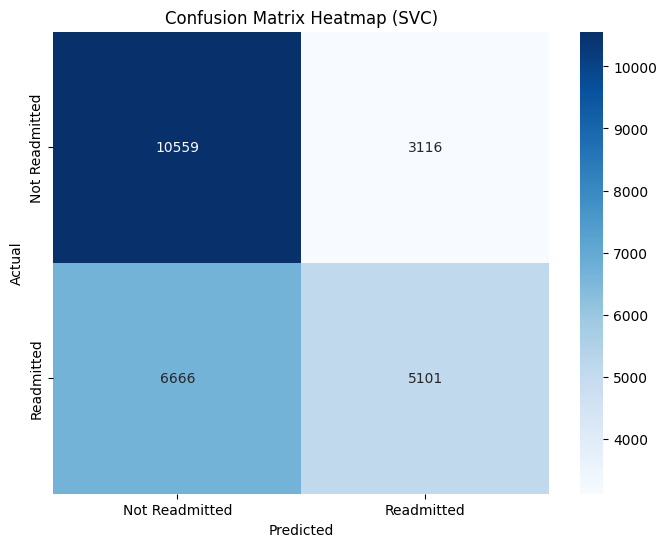

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(Y_test, Y_pred)

# Plotting the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Readmitted', 'Readmitted'],
            yticklabels=['Not Readmitted', 'Readmitted'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap (SVC)')
plt.show()



In [ ]:
from sklearn.metrics import classification_report

accuracy_svc = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy_svc:.4f}")
print(conf_matrix)

# Generate classification report
class_report = classification_report(Y_test, Y_pred)

# Print the classification report
print(class_report)


Accuracy: 0.6155
[[10559  3116]
 [ 6666  5101]]
              precision    recall  f1-score   support

           0       0.61      0.77      0.68     13675
           1       0.62      0.43      0.51     11767

    accuracy                           0.62     25442
   macro avg       0.62      0.60      0.60     25442
weighted avg       0.62      0.62      0.60     25442



In [ ]:
from sklearn.linear_model import LogisticRegression
# Train a logistic regression model
logreg = LogisticRegression(max_iter=500, random_state=42)
logreg.fit(X_train_selected, Y_train)

# Predict on the test data
Y_pred_logreg = logreg.predict(X_test_selected)


In [ ]:
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred_logreg)
conf_matrix_log = confusion_matrix(Y_test, Y_pred_logreg)
class_report = classification_report(Y_test, Y_pred_logreg)

In [ ]:
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix_log)
print("Classification Report:")
print(class_report)


Accuracy: 0.6115
Confusion Matrix:
[[11184  2491]
 [ 7394  4373]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.82      0.69     13675
           1       0.64      0.37      0.47     11767

    accuracy                           0.61     25442
   macro avg       0.62      0.59      0.58     25442
weighted avg       0.62      0.61      0.59     25442



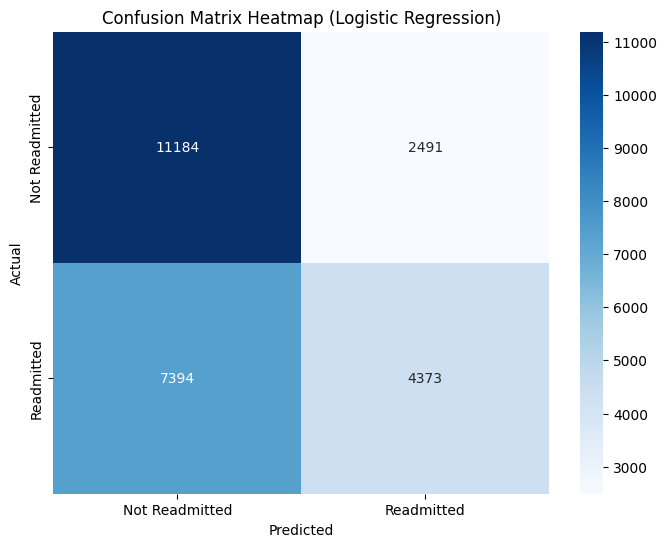

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Plotting the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Readmitted', 'Readmitted'],
            yticklabels=['Not Readmitted', 'Readmitted'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap (Logistic Regression)')
plt.show()



In [ ]:
from sklearn.svm import SVC

# Initialize SVC classifier with decision_function_shape='ovr'
classifier_svc = SVC(kernel='rbf', decision_function_shape='ovr')

# Fit the classifier
classifier_svc.fit(X_train_selected, Y_train)

# Now you can use decision_function
svc_scores = classifier_svc.decision_function(X_test_selected)


In [ ]:
from sklearn.metrics import roc_curve, auc
# Calculate FPR, TPR, and thresholds
fpr_svc, tpr_svc, thresholds_svc = roc_curve(Y_test, svc_scores)

# Calculate AUC
roc_auc_svc = auc(fpr_svc, tpr_svc)

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logreg = LogisticRegression(max_iter=500, random_state=42)
logreg.fit(X_train_selected, Y_train)

# Assuming classifier_logreg is your trained Logistic Regression classifier
# Get the decision function scores
logreg_scores = classifier_logreg.decision_function(X_test)

# Calculate FPR, TPR, and thresholds
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(Y_test, logreg_scores)

# Calculate AUC
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)


NameError: name 'classifier_logreg' is not defined

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression


# Get the decision function scores
logreg_scores = logreg.decision_function(X_test_selected)

# Calculate FPR, TPR, and thresholds
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(Y_test, logreg_scores)

# Calculate AUC
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)


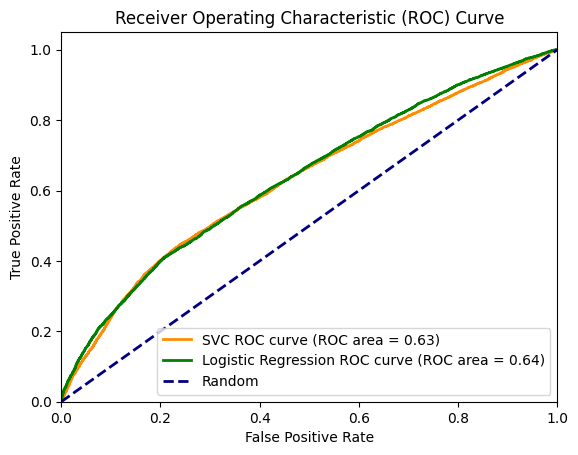

In [ ]:
plt.figure()
plt.plot(fpr_svc, tpr_svc, color='darkorange', lw=2, label='SVC ROC curve (ROC area = %0.2f)' % roc_auc_svc)
plt.plot(fpr_logreg, tpr_logreg, color='green', lw=2, label='Logistic Regression ROC curve (ROC area = %0.2f)' % roc_auc_logreg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label ='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


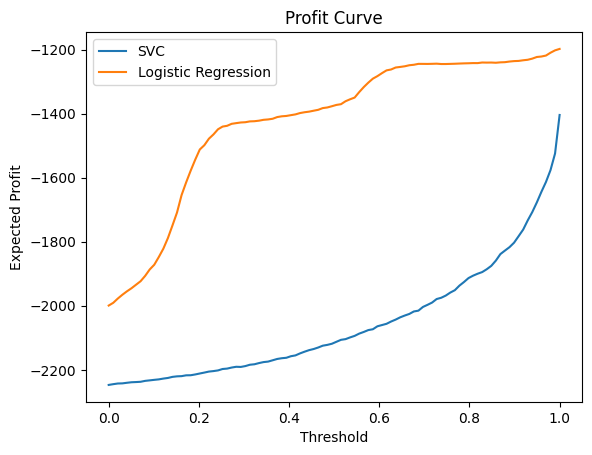

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define cost-benefit matrix (example)
cost_benefit_matrix = np.array([[0, -13000], [-2500, 0]])

# Calculate profit for each classification threshold
thresholds = np.linspace(0, 1, 100)
profits_svc = []
profits_logreg = []

for threshold in thresholds:
    # For SVC
    y_svc_pred = (svc_scores > threshold).astype(int)
    cm_svc = confusion_matrix(Y_test, y_svc_pred)
    profit_svc = np.sum(cm_svc * cost_benefit_matrix) / np.sum(cm_svc) # Corrected division
    profits_svc.append(profit_svc)

    # For Logistic Regression
    y_logreg_pred = (logreg_scores > threshold).astype(int)
    cm_logreg = confusion_matrix(Y_test, y_logreg_pred)
    profit_logreg = np.sum(cm_logreg * cost_benefit_matrix) / np.sum(cm_logreg) # Corrected division
    profits_logreg.append(profit_logreg)

# Plot profit curves
plt.plot(thresholds, profits_svc, label='SVC')
plt.plot(thresholds, profits_logreg, label='Logistic Regression')
plt.xlabel('Threshold')
plt.ylabel('Expected Profit')
plt.title('Profit Curve')
plt.legend()
plt.show()


In [ ]:
!pip install gower

H Clustering

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from gower import gower_matrix
import matplotlib.pyplot as plt


df_final_cleaned = df_final.dropna(subset=['race'])

subset_df = df_final_cleaned.head(20000)


# Select numeric features and encode categorical variables simultaneously
X_numeric_categorical = subset_df[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                                    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses',
                                    'race', 'gender', 'age', 'change', 'diabetesMed']]

# Convert categorical variables using one-hot encoding and convert boolean values to integers
X_numeric = X_numeric_categorical.drop(columns=['race', 'gender', 'age', 'change', 'diabetesMed'])
X_categorical = pd.get_dummies(X_numeric_categorical[["race", "gender", "age", "change", "diabetesMed"]]).astype(int)

# Standardize numerical features
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

X_numeric_scaled_df = pd.DataFrame(X_numeric_scaled, index=X_numeric.index)

# Join standardized numerical features and one-hot encoded categorical features based on index
X_all = X_numeric_scaled_df.join(X_categorical)

distance_matrix = gower_matrix(X_all)

from scipy.spatial.distance import squareform

# Convert distance matrix to condensed format
condensed_distance_matrix = squareform(distance_matrix)

# Hierarchical clustering
linkage_matrix = linkage(condensed_distance_matrix, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()


In [ ]:
from scipy.cluster.hierarchy import fcluster
num_clusters = 3
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Print cluster assignments
print("Cluster assignments:")
print(clusters)

In [ ]:
# Assuming 'clusters' contains the cluster labels assigned to each row
# Add cluster labels to the cleaned DataFrame
subset_df.loc[:, 'cluster'] = clusters

# Group the DataFrame by cluster and calculate the readmission rate for each cluster
readmission_rate = subset_df.groupby('cluster')['readmitted'].mean()

print("Readmission rate in each cluster:")
print(readmission_rate)


In [ ]:
from sklearn.metrics import silhouette_score

# Compute silhouette score
silhouette_avg = silhouette_score(X_all, clusters)
print("Silhouette Score:", silhouette_avg)


In [ ]:
# Convert feature names to strings
X_all.columns = X_all.columns.astype(str)

# Initialize the KMeans clustering algorithm with desired number of clusters
num_clusters = 3  # You can adjust this based on your requirement
kmeans = KMeans(n_clusters=num_clusters)

# Fit the KMeans model to the data
kmeans.fit(X_all)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
subset_df.loc[:, 'cluster_kmeans'] = cluster_labels

# Print the counts of data points in each cluster
print("Counts of data points in each cluster:")
print(subset_df['cluster_kmeans'].value_counts())

# Alternatively, you can directly use the cluster labels to access data points in each cluster
clusters_data = {}
for cluster_label in range(num_clusters):
    clusters_data[cluster_label] = subset_df[subset_df['cluster_kmeans'] == cluster_label]

# Now you can further analyze each cluster or perform any other tasks as needed


In [ ]:
subset_df

In [ ]:
readmission_rate = subset_df.groupby('cluster_kmeans')['readmitted'].mean()

print("Readmission rate in each cluster:")
print(readmission_rate)

In [ ]:
from sklearn.metrics import silhouette_score

# Assuming you have already performed clustering and have cluster labels
silhouette_avg = silhouette_score(X_all, cluster_labels)
print("Silhouette Score KMeans:", silhouette_avg)
